<a href="https://colab.research.google.com/github/AzamNoor123/Smoke-and-fire-detection-ML-Model/blob/detection-model/smoke_and_fire_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ===============================
# STEP 1: Setup environment
# ===============================
!pip install ultralytics opencv-python matplotlib --quiet

import torch, cv2, matplotlib
from ultralytics import YOLO

print("PyTorch:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("OpenCV:", cv2.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.6 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch: 2.8.0+cu126
CUDA available: True
OpenCV: 4.12.0


In [ ]:
# ===============================
# STEP 2: Mount Google Drive (to save dataset & results)
# ===============================
from google.colab import drive
drive.mount('/content/drive')

# Change path to your project folder in Google Drive
project_path = "/content/drive/MyDrive/yolo_project"


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke"
!ls "{dataset_path}"





data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [ ]:
# Write the data.yaml content to a file
dataset_path = "/content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke"
data_yaml_content = """
path: {}
train: train
val: valid
test: test
nc: 2
names: ['fire', 'smoke']
""".format(dataset_path)

with open(f"{dataset_path}/data.yaml", "w") as f:
    f.write(data_yaml_content)

print(f"data.yaml created at {dataset_path}/data.yaml")

data.yaml created at /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/data.yaml


In [ ]:
from ultralytics import YOLO

# Load pretrained model
model = YOLO("yolo11n.pt")

# Train on your smoke dataset
model.train(
    data="/content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/data.yaml",
    epochs=10,
    imgsz=640,
    batch=16
)


Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspe

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

YOLO11n summary: 181 layers, 2,590,230 parameters, 2,590,214 gradients, 6.4 GFLOPs

Transferred 448/499 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.2±1.2 ms, read: 0.2±0.0 MB/s, size: 57.9 KB)


train: Scanning /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/train/labels.cache... 7050 images, 10 backgrounds, 308 corrupt: 100%|██████████| 7060/7060 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/train/images/flare_0001_jpg.rf.4ec14a19ae2a4009f8b1a738884503ce.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0232]
train: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/train/images/flare_0001_jpg.rf.a62d53bbf20c014e34b0807ccc992917.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0587]
train: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/train/images/flare_0009_jpg.rf.13150e1263a2cd3709bd0e9627e307d0.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0627]
train: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/train/images/flare_0009_jpg.rf.26f519441c575b95fc241db378b6e7c6.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0307]
train: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/train/images/flare_000

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.5±0.3 ms, read: 0.1±0.0 MB/s, size: 37.8 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/labels.cache... 40 images, 0 backgrounds, 2 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/images/flare_0064_jpg.rf.e9635b9b21600f6eaa120f4006f19468.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.145]
val: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/images/flare_0085_jpg.rf.5649f147e9a57f26492ec6c4af31cb16.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1084]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.19G      1.581      2.099      1.727         38        640: 100%|██████████| 422/422 [05:38<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.98s/it]

                   all         38         93      0.562      0.546      0.526       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.72G      1.502      1.283      1.636         34        640: 100%|██████████| 422/422 [02:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         38         93      0.689      0.568      0.604      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.73G      1.408      1.022      1.559         32        640: 100%|██████████| 422/422 [02:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         38         93      0.647      0.596      0.566      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.73G      1.308      0.869      1.475         34        640: 100%|██████████| 422/422 [02:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         38         93      0.741      0.693      0.699      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.73G      1.184     0.7425      1.381         29        640: 100%|██████████| 422/422 [02:12<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.01it/s]

                   all         38         93      0.725      0.535      0.576      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.73G      1.099     0.6607      1.323         37        640: 100%|██████████| 422/422 [02:10<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.81it/s]

                   all         38         93      0.847      0.592      0.689      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.75G      1.022     0.5958      1.265         35        640: 100%|██████████| 422/422 [02:13<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         38         93      0.862      0.648      0.706      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.76G     0.9543     0.5495       1.22         34        640: 100%|██████████| 422/422 [02:12<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         38         93      0.783      0.672      0.661      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.76G     0.8823     0.5028      1.175         38        640: 100%|██████████| 422/422 [02:14<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         38         93      0.826      0.644      0.707      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.76G     0.8116     0.4618       1.13         40        640: 100%|██████████| 422/422 [02:14<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         38         93      0.917      0.641      0.702      0.373



10 epochs completed in 0.434 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]


                   all         38         93      0.917      0.641      0.702      0.373
                  fire         38         56      0.972      0.768      0.849      0.525
                 smoke         26         37      0.861      0.514      0.555       0.22
Speed: 0.6ms preprocess, 3.5ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2d18b9f200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
model.val()


Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.7±0.3 ms, read: 21.7±3.1 MB/s, size: 30.6 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/labels.cache... 40 images, 0 backgrounds, 2 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/images/flare_0064_jpg.rf.e9635b9b21600f6eaa120f4006f19468.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.145]
val: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/images/flare_0085_jpg.rf.5649f147e9a57f26492ec6c4af31cb16.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1084]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.83it/s]


                   all         38         93      0.916      0.641      0.702      0.373
                  fire         38         56      0.973      0.768      0.849      0.526
                 smoke         26         37       0.86      0.514      0.555       0.22
Speed: 5.0ms preprocess, 17.1ms inference, 0.0ms loss, 4.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c2b5cffc200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804


image 1/20 /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/test/images/flare_0014_jpg.rf.74f970ef7f276751cfa312c22dfcc5de.jpg: 640x640 1 fire, 11.0ms
image 2/20 /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/test/images/flare_0028_jpg.rf.931ef592dcd4fedef2fb22effaf4a325.jpg: 640x640 1 fire, 8.8ms
image 3/20 /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/test/images/flare_0029_jpg.rf.80711e6faf9d9d48064c8b37e11cf52f.jpg: 640x640 1 fire, 5 smokes, 8.5ms
image 4/20 /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/test/images/flare_0057_jpg.rf.b9157dd927c01b0be7d4cf23fe33dcbe.jpg: 640x640 1 fire, 8.3ms
image 5/20 /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/test/images/flare_0058_jpg.rf.7f6b38a665dddf45c5d813647749841b.jpg: 640x640 1 fire, 1 smoke, 8.3ms
image 6/20 /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/test/images/flare_0059_jpg.rf.4a25cb1edecc15b105746fff59987cf0.jpg: 640x640 2 fires, 

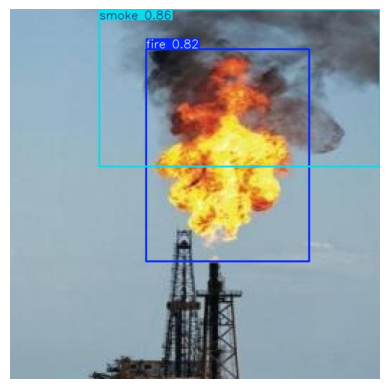

In [ ]:
results = model.predict(
    source="/content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/test/images",
    conf=0.25,
    save=True
)

# Display one result inline
import matplotlib.pyplot as plt
from PIL import Image
import os

img_path = os.path.join(results[0].save_dir, os.path.basename(results[4].path))
plt.imshow(Image.open(img_path))
plt.axis("off")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
model_path = "runs/detect/train/weights/best.pt"
print(model_path)

runs/detect/train/weights/best.pt


In [ ]:
!cp runs/detect/train/weights/best.pt "/content/drive/MyDrive/firesmoke_best.pt"


In [ ]:
!zip -r model_files.zip runs/detect/train/weights/
from google.colab import files
files.download("model_files.zip")


updating: runs/detect/train/weights/ (stored 0%)
updating: runs/detect/train/weights/last.pt (deflated 10%)
updating: runs/detect/train/weights/best.pt (deflated 10%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

# Load trained model
model = YOLO("runs/detect/train/weights/best.pt")

# Validate on dataset
metrics = model.val(data="/content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/data.yaml")  # or your custom yaml path

Ultralytics 8.3.185 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 15.7±5.7 MB/s, size: 31.7 KB)


val: Scanning /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/labels.cache... 40 images, 0 backgrounds, 2 corrupt: 100%|██████████| 40/40 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/images/flare_0064_jpg.rf.e9635b9b21600f6eaa120f4006f19468.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.145]
val: /content/drive/MyDrive/Colab Notebooks/smoke dataset/firesmoke/valid/images/flare_0085_jpg.rf.5649f147e9a57f26492ec6c4af31cb16.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.1084]



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]


                   all         38         93      0.916      0.641      0.702      0.373
                  fire         38         56      0.973      0.768      0.849      0.526
                 smoke         26         37       0.86      0.514      0.555       0.22
Speed: 11.3ms preprocess, 8.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/val3


In [ ]:
print("Precision:", metrics.results_dict['metrics/precision(B)'])
print("Recall:", metrics.results_dict['metrics/recall(B)'])
print("mAP50:", metrics.results_dict['metrics/mAP50(B)'])
print("mAP50-95:", metrics.results_dict['metrics/mAP50-95(B)'])


Precision: 0.9164166268694407
Recall: 0.6406853281853282
mAP50: 0.7018764076465542
mAP50-95: 0.3728045369624501
